In [10]:
# https://medium.com/
#@m.alzantot/deep-reinforcement-learning-demysitifed-episode-2-policy-iteration-value-iteration-and-q-978f9e89ddaa

## https://github.com/malzantot/ReinforcementLearning_examples

In [142]:
# https://github.com/malzantot/ReinforcementLearning_examples
# https://github.com/dxganta/solving_openai/blob/master/FrozenLake8x8/frozenLake8x8.py 
# https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py
"""
Adapted from the Solving FrozenLake8x8 environment using Value-Itertion by Moustafa Alzantot and Diganta Kalita
"""

import numpy as np
import gym
from gym import wrappers


def run_episode(env, policy, gamma = 1.0, render = False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.

    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.

    returns:
    total reward: real value of the total reward recieved by agent under policy.
    """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward


def evaluate_policy(env, policy, gamma = 1.0,  n = 10000):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores), np.max(scores)

def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                # next_sr is a tuple of (probability, next state, reward, done)
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy


def value_iteration(env, gamma = 1.0, max_iterations = 100000):
    """ Value-iteration algorithm """
    v = np.zeros(env.nS)  # initialize value-function
    
    eps = 1e-20
    converged_at = 0
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            converged_at = i+1
            break
    return v, converged_at

def compute_policy_v(env, policy, gamma=1.0):
    """ Iteratively evaluate the value-function under policy.
    Alternatively, we could formulate a set of linear equations in iterms of v[s] 
    and solve them to find the value function.
    """
    v = np.zeros(env.nS)
    eps = 1e-10
    converged_at = 0
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            # value converged
            break
    return v

def policy_iteration(env = gym.make('FrozenLake8x8-v1', desc=None, is_slippery=True), gamma = 1.0, 
                     max_iterations = 100000):
    """ Policy-Iteration algorithm """
    policy = np.random.choice(env.nA, size=(env.nS))  # initialize a random policy
    
    gamma = 1.0
    coverged_at = 0
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            coverged_at = (i+1)
            break
        policy = new_policy
    return policy, coverged_at

if __name__ == '__main__':
    env_name  = 'FrozenLake8x8-v1'
    gamma = 1.0
    env = gym.make(env_name, desc=None, is_slippery=True)
    print('FrozenLake8x8-v1 stats')
    optimal_v = value_iteration(env, gamma);
    policy = extract_policy(optimal_v, gamma)
    #policy_score = evaluate_policy(env, policy, gamma, n=1000)
    print('Policy average score = ', policy_score)
    
    #env_4x4 = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
    #print('FrozenLake4x4-v1 stats')
    #optimal_v_4x4 = value_iteration(env_4x4, gamma);
    #policy_4x4 = extract_policy(optimal_v_4x4, gamma)
    #policy_score_4x4 = evaluate_policy(env_4x4, policy_4x4, gamma, n=1000)
    #print('Policy average score = ', policy_score_4x4)

FrozenLake8x8-v1 stats
Value-iteration converged at iteration# 2357.
Policy average score =  (0.87, 1.0)


In [ ]:
# https://www.kaggle.com/code/girgismicheal/atari-games-using-q-learning
# 
def get_env(env_name):
  """ This function takes the environment name and return the environment after resetting 
  input: env_name -> string
  return: env -> the environment object
  """
  env = gym.make(env_name)
  env.reset() # reset environment to a new, random state
  return env

def frame_builder(env):
  """  this function take the env and take actions till the game done and return the frames of the game

  Input:  
      env -> environment object
  Output:
      frames -> list of dictionaries as each frame has [{action, frame, reward, state},....]
  """
  env.render()  
  epochs = 0
  penalties, reward = 0, 0
  frames = []
  done = False
  state =  env.reset()
  while not done:
    # automatically selects one random action 
      action = env.action_space.sample()
      state, reward, done, info = env.step(action)

      if reward == -10:
          penalties += 1

      # Put each rendered frame into dict for animation
      frames.append({
          'frame': env.render(mode='ansi'),
          'state': state,
          'action': action,
          'reward': reward
          }
      )
      epochs += 1
  return frames

env = gym.make(env_name, desc=None, is_slippery=True)
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
frames = frame_builder(env)

In [62]:
env = gym.make('FrozenLake8x8-v1', desc=None, map_name="4x4", is_slippery=True)
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
frames = frame_builder(env)

Action Space Discrete(4)
State Space Discrete(16)

SFFF
FHFH
FFFH
HFFG


In [173]:
env = gym.make('FrozenLake-v1', desc=None, is_slippery=True)
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
frames = frame_builder(env)

Action Space Discrete(4)
State Space Discrete(16)

SFFF
FHFH
FFFH
HFFG


In [180]:
import time as tm
env = gym.make('FrozenLake8x8-v1', desc=None, is_slippery=True)

time_array_policy=[]
time_array_value=[]
gamma_arr=[]
iters_policy=[]
iters_value=[]
scores_value_max=[]
scores_value_mean=[]
scores_policy_max=[]
scores_policy_mean=[]
gamma_arr = [0.1,0.2,0.3,0.4,0.5, 0.9, 0.95, 0.99]
### POLICY ITERATION AND VALUE ITERATIONS ####
for gamma in gamma_arr :
    # policy iteations 
    st=tm.time()
    best_policy,converged_at = policy_iteration(env, gamma )
    mean_score, max_score = evaluate_policy(env, best_policy, gamma )
    end=tm.time()
    scores_policy_mean.append(mean_score)
    scores_policy_max.append(max_score)
    iters_policy.append(converged_at)
    time_array_policy.append(end-st)
    
    # Value Iteration
    st=tm.time()
    best_policy,converged_at = value_iteration(env, gamma )
    mean_score, max_score = evaluate_policy(env, best_policy, gamma )
    end=tm.time()
    scores_value_mean.append(mean_score)
    scores_value_max.append(max_score)
    iters_value.append(converged_at)
    time_array_value.append(end-st)


Policy-Iteration converged at step 7.
Value-iteration converged at iteration# 2357.
Policy-Iteration converged at step 7.
Value-iteration converged at iteration# 2357.
Policy-Iteration converged at step 7.
Value-iteration converged at iteration# 2357.
Policy-Iteration converged at step 12.
Value-iteration converged at iteration# 2357.
Policy-Iteration converged at step 7.
Value-iteration converged at iteration# 2357.
Policy-Iteration converged at step 13.
Value-iteration converged at iteration# 2357.
Policy-Iteration converged at step 13.
Value-iteration converged at iteration# 2357.
Policy-Iteration converged at step 13.
Value-iteration converged at iteration# 2357.


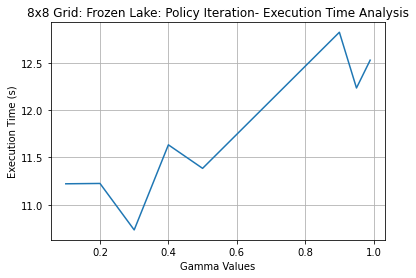

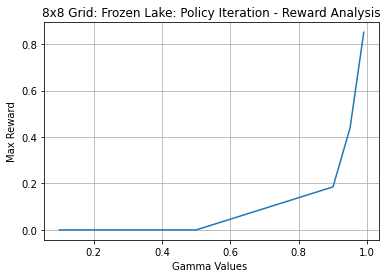

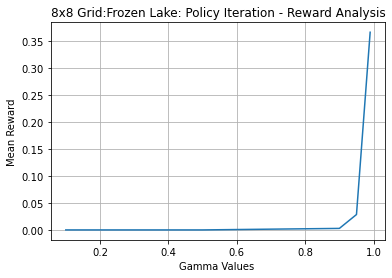

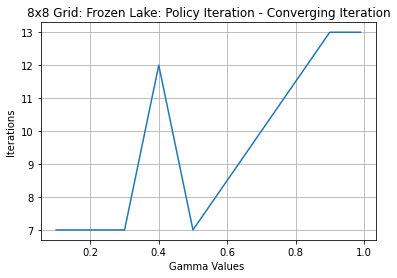

In [181]:
plt.plot(gamma_arr, time_array_policy)
plt.xlabel('Gamma Values')
plt.title('8x8 Grid: Frozen Lake: Policy Iteration- Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

plt.plot(gamma_arr,scores_policy_max)
plt.xlabel('Gamma Values ')
plt.ylabel('Max Reward')
plt.title('8x8 Grid: Frozen Lake: Policy Iteration - Reward Analysis')
plt.grid()
plt.show()

plt.plot(gamma_arr,scores_policy_mean)
plt.xlabel('Gamma Values ')
plt.ylabel('Mean Reward')
plt.title('8x8 Grid:Frozen Lake: Policy Iteration - Reward Analysis')
plt.grid()
plt.show()


plt.plot(gamma_arr,iters_policy)
plt.xlabel('Gamma Values ')
plt.ylabel('Iterations ')
plt.title('8x8 Grid: Frozen Lake: Policy Iteration - Converging Iteration')
plt.grid()
plt.show()

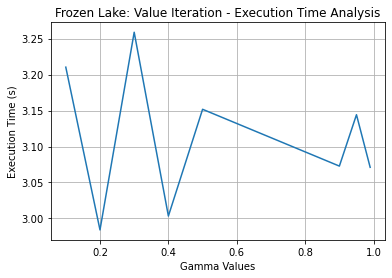

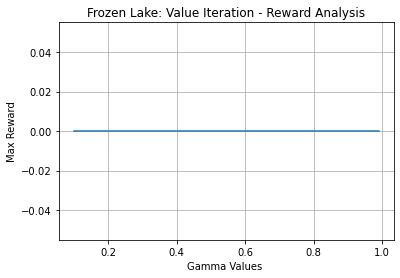

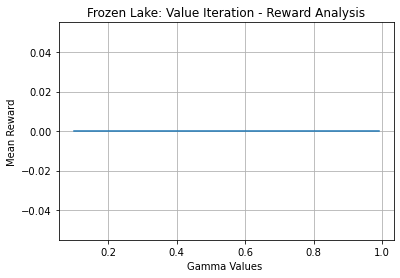

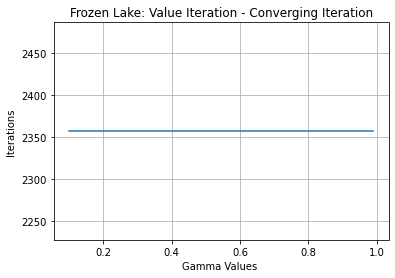

In [138]:
plt.plot(gamma_arr, time_array_value)
plt.xlabel('Gamma Values')
plt.title('Frozen Lake: Value Iteration - Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

plt.plot(gamma_arr,scores_value_max)
plt.xlabel('Gamma Values ')
plt.ylabel('Max Reward')
plt.title('Frozen Lake: Value Iteration - Reward Analysis')
plt.grid()
plt.show()

plt.plot(gamma_arr,scores_value_mean)
plt.xlabel('Gamma Values ')
plt.ylabel('Mean Reward')
plt.title('Frozen Lake: Value Iteration - Reward Analysis')
plt.grid()
plt.show()

plt.plot(gamma_arr,iters_value)
plt.xlabel('Gamma Values ')
plt.ylabel('Iterations ')
plt.title('Frozen Lake: Value Iteration - Converging Iteration')
plt.grid()
plt.show()

In [183]:
env = gym.make('FrozenLake8x8-v1', desc=None, is_slippery=True)

time_array_policy=[]
time_array_value=[]
gamma = 0.99
iters_policy=[]
iters_value=[]
scores_value_max=[]
scores_value_mean=[]
scores_policy_max=[]
scores_policy_mean=[]
iterat_arr = [10,100, 1000, 2000, 5000, 10000]
### POLICY ITERATION AND VALUE ITERATIONS ####
for num_iter in iterat_arr :
    # policy iteations 
    st=tm.time()
    best_policy,converged_at = policy_iteration(env, gamma, num_iter )
    mean_score, max_score = evaluate_policy(env, best_policy, gamma, num_iter)
    end=tm.time()
    scores_policy_mean.append(mean_score)
    scores_policy_max.append(max_score)
    iters_policy.append(converged_at)
    time_array_policy.append(end-st)
    
    # Value Iteration
    st=tm.time()
    best_policy,converged_at = value_iteration(env, gamma, num_iter )
    mean_score, max_score = evaluate_policy(env, best_policy, gamma, num_iter)
    end=tm.time()
    scores_value_mean.append(mean_score)
    scores_value_max.append(max_score)
    iters_value.append(converged_at)
    time_array_value.append(end-st)

Policy-Iteration converged at step 7.
Policy-Iteration converged at step 12.
Policy-Iteration converged at step 12.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 7.
Value-iteration converged at iteration# 2357.
Policy-Iteration converged at step 12.
Value-iteration converged at iteration# 2357.


ValueError: x and y must have same first dimension, but have shapes (6,) and (8,)

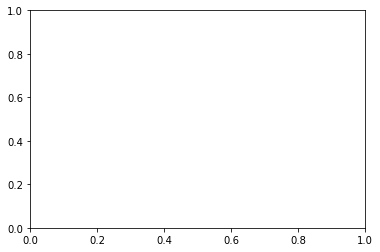

In [182]:
plt.plot(iterat_arr, scores_policy_max)
plt.xlabel('# of Iterations')
plt.title('Frozen Lake: policy Iteration - Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

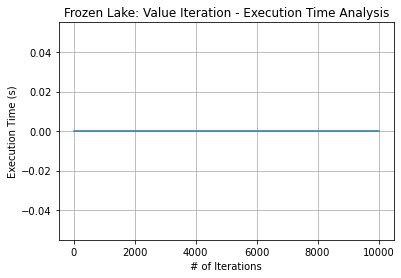

In [150]:
plt.plot(iterat_arr, scores_value_max)
plt.xlabel('# of Iterations')
plt.title('Frozen Lake: Value Iteration - Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

In [154]:
# Q learning 
# https://gist.github.com/jojonki/6291f8c3b19799bc2f6d5279232553d7
ALPHA = 0.1 # learning rate
GAMMA = 0.99 # reward discount
LEARNING_COUNT = 100000
TEST_COUNT = 10000

TURN_LIMIT = 100
IS_MONITOR = False

class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        self.q_val = np.zeros(16 * 4).reshape(16, 4).astype(np.float32)

    def learn(self):
        # one episode learning
        state = self.env.reset()
        #self.env.render()
        
        for t in range(TURN_LIMIT):
            act = self.env.action_space.sample() # random
            next_state, reward, done, info = self.env.step(act)
            q_next_max = np.max(self.q_val[next_state])
            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            self.q_val[state][act] = (1 - ALPHA) * self.q_val[state][act]\
                                 + ALPHA * (reward + GAMMA * q_next_max)
            
            #self.env.render()
            if done:
                return reward
            else:
                state = next_state

    def test(self):
        state = self.env.reset()
        for t in range(TURN_LIMIT):
            act = np.argmax(self.q_val[state])
            next_state, reward, done, info = self.env.step(act)
            if done:
                return reward
            else:
                state = next_state
        return 0.0 # over limit


In [158]:
env = gym.make("FrozenLake-v1")
agent = Agent(env)
reward_total = 0.0
for i in range(LEARNING_COUNT):
    reward_total += agent.learn()

print("episodes      : {}".format(LEARNING_COUNT))
print("total reward  : {}".format(reward_total))
print("average reward: {:.2f}".format(reward_total / LEARNING_COUNT))
print("Q Value       :{}".format(agent.q_val))

print("###### TEST #####")
reward_total = 0.0
    
for i in range(TEST_COUNT):
    reward_total += agent.test()
    
print("episodes      : {}".format(TEST_COUNT))
print("total reward  : {}".format(reward_total))
print("average reward: {:.2f}".format(reward_total / TEST_COUNT))

episodes      : 100000
total reward  : 1453.0
average reward: 0.01
Q Value       :[[0.56450504 0.5559369  0.5563781  0.5489476 ]
 [0.30431202 0.2881598  0.3365267  0.5337564 ]
 [0.4635859  0.484869   0.45815092 0.50694984]
 [0.3219083  0.27657017 0.2597437  0.4870684 ]
 [0.5829813  0.33522946 0.34324506 0.401818  ]
 [0.         0.         0.         0.        ]
 [0.28915113 0.2432748  0.38136858 0.19821134]
 [0.         0.         0.         0.        ]
 [0.33305234 0.47733533 0.5092244  0.63891566]
 [0.58552647 0.69717175 0.44254068 0.3476925 ]
 [0.6340438  0.60854644 0.48058456 0.3142084 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.38075778 0.31056985 0.78228474 0.4625094 ]
 [0.7270046  0.8454958  0.8250084  0.86537254]
 [0.         0.         0.         0.        ]]
###### TEST #####
episodes      : 10000
total reward  : 5940.0
average reward: 0.59


In [167]:
gamma_arr_q = [0.1,0.2,0.3,0.4,0.5, 0.9, 0.95, 0.99]

time_array_q=[]
iters_value=[]
scores_q_mean=[]
scores_q_test=[]

for gamma in gamma_arr_q :
    # policy iteations 
    GAMMA = gamma
    reward_total = 0.0
    env = gym.make("FrozenLake-v1")
    agent = Agent(env)
    start_time = tm.time()
    for i in range(LEARNING_COUNT):
        reward_total += agent.learn()
    end = tm.time()
    #scores_q_mean.append()
    scores_q_mean.append(reward_total/LEARNING_COUNT)
    time_array_q.append(end-start_time)
    
    reward_total = 0.0
    for i in range(TEST_COUNT):
        reward_total += agent.test()
        
    scores_q_test.append(reward_total/TEST_COUNT )
 

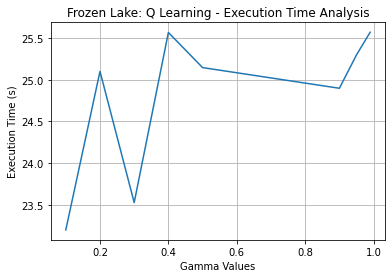

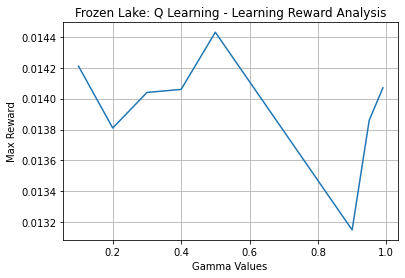

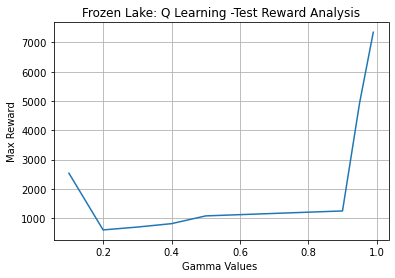

In [169]:
plt.plot(gamma_arr, time_array_q)
plt.xlabel('Gamma Values')
plt.title('Frozen Lake: Q Learning - Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

plt.plot(gamma_arr,scores_q_mean)
plt.xlabel('Gamma Values ')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake: Q Learning - Learning Reward Analysis')
plt.grid()
plt.show()

plt.plot(gamma_arr,scores_q_test)
plt.xlabel('Gamma Values ')
plt.ylabel('Max Reward')
plt.title('Frozen Lake: Q Learning -Test Reward Analysis')
plt.grid()
plt.show()


In [176]:
alpha_arr_q = [0.001, 0.05,0.075, 0.1,0.15]

time_array_q_2=[]

scores_q_mean_2=[]
scores_q_test_2=[]

for alpha in alpha_arr_q :
    # policy iteations 
    GAMMA = 0.99
    ALPHA = alpha
    reward_total = 0.0
    env = gym.make("FrozenLake-v1")
    agent = Agent(env)
    start_time = tm.time()
    for i in range(LEARNING_COUNT):
        reward_total += agent.learn()
    end = tm.time()
    #scores_q_mean.append()
    scores_q_mean_2.append(reward_total/LEARNING_COUNT)
    time_array_q_2.append(end-start_time)
    
    reward_total = 0.0
    for i in range(TEST_COUNT):
        reward_total += agent.test()
        
    scores_q_test_2.append(reward_total/TEST_COUNT)
 

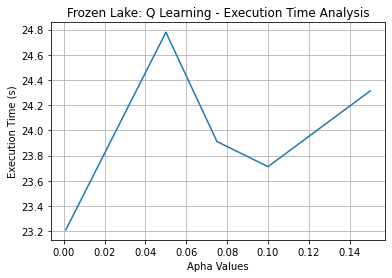

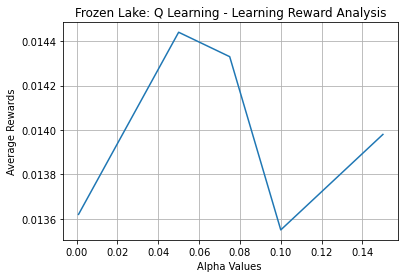

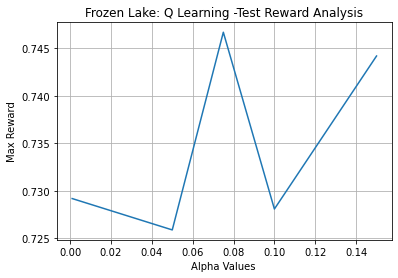

In [177]:
plt.plot(alpha_arr_q, time_array_q_2)
plt.xlabel('Apha Values')
plt.title('Frozen Lake: Q Learning - Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

plt.plot(alpha_arr_q,scores_q_mean_2)
plt.xlabel('Alpha Values ')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake: Q Learning - Learning Reward Analysis')
plt.grid()
plt.show()

plt.plot(alpha_arr_q,scores_q_test_2)
plt.xlabel('Alpha Values ')
plt.ylabel('Max Reward')
plt.title('Frozen Lake: Q Learning -Test Reward Analysis')
plt.grid()
plt.show()